In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Implement Decision Tree

In [53]:
data=pd.read_excel(r'C:\Users\lenovo\Downloads\dt (1).xlsx')

In [54]:
print(data)

    RID          age  income student credit_rating buys_computer
0     1        youth    high      no          fair            no
1     2        youth    high      no     excellent            no
2     3  middle_aged    high      no          fair           yes
3     4       senior  medium      no          fair           yes
4     5       senior    low      yes          fair           yes
5     6       senior    low      yes     excellent            no
6     7  middle_aged    low      yes     excellent           yes
7     8        youth  medium      no          fair            no
8     9        youth    low      yes          fair           yes
9    10       senior  medium     yes          fair           yes
10   11        youth  medium     yes     excellent           yes
11   12  middle_aged  medium      no     excellent           yes
12   13  middle_aged    high     yes          fair           yes
13   14       senior  medium      no     excellent            no


## Data Encoding

In [55]:
#Encode the text or non numerical data into numerical value

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
# create instances for class LableEncoder
le_age = LabelEncoder() 
le_income = LabelEncoder() 
le_student = LabelEncoder() 
le_credit_rating = LabelEncoder() 
le_buys_computer = LabelEncoder() 

In [58]:
# fit_tranform 
data['age_n']=le_age.fit_transform(data['age'])
data['income_n']=le_income.fit_transform(data['income'])
data['student_n']=le_student.fit_transform(data['student'])
data['credit_rating_n']=le_credit_rating.fit_transform(data['credit_rating'])
data['buys_computer_n']=le_buys_computer.fit_transform(data['buys_computer'])

In [59]:
data.head()

,RID,age,income,student,credit_rating,buys_computer,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,youth,high,no,fair,no,2,0,0,1,0
1,2,youth,high,no,excellent,no,2,0,0,0,0
2,3,middle_aged,high,no,fair,yes,0,0,0,1,1
3,4,senior,medium,no,fair,yes,1,2,0,1,1
4,5,senior,low,yes,fair,yes,1,1,1,1,1


In [60]:
data_new=data.drop(['age','income','student','credit_rating','buys_computer'],axis=1)
data_new

,RID,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,2,0,0,1,0
1,2,2,0,0,0,0
2,3,0,0,0,1,1
3,4,1,2,0,1,1
4,5,1,1,1,1,1
5,6,1,1,1,0,0
6,7,0,1,1,0,1
7,8,2,2,0,1,0
8,9,2,1,1,1,1
9,10,1,2,1,1,1


In [61]:
feature_cols=['age_n', 'income_n', 'student_n', 'credit_rating_n']
x = data_new.drop(['buys_computer_n', 'RID'],axis = 'columns')
y = data_new['buys_computer_n']

In [62]:
x

,age_n,income_n,student_n,credit_rating_n
0,2,0,0,1
1,2,0,0,0
2,0,0,0,1
3,1,2,0,1
4,1,1,1,1
5,1,1,1,0
6,0,1,1,0
7,2,2,0,1
8,2,1,1,1
9,1,2,1,1


In [63]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: buys_computer_n, dtype: int32

## Devide the data into train and test

In [64]:
# for splitting
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size = 0.25,random_state=42)

In [66]:
x_train

,age_n,income_n,student_n,credit_rating_n
5,1,1,1,0
8,2,1,1,1
2,0,0,0,1
1,2,0,0,0
13,1,2,0,0
4,1,1,1,1
7,2,2,0,1
10,2,2,1,0
3,1,2,0,1
6,0,1,1,0


In [67]:
y_train

5     0
8     1
2     1
1     0
13    0
4     1
7     0
10    1
3     1
6     1
Name: buys_computer_n, dtype: int32

In [68]:
x_test

,age_n,income_n,student_n,credit_rating_n
9,1,2,1,1
11,0,2,0,0
0,2,0,0,1
12,0,0,1,1


In [69]:
y_test

9     1
11    1
0     0
12    1
Name: buys_computer_n, dtype: int32

pd.concat() is a function from the Pandas library in Python used to concatenate (or combine) two or more DataFrames or Series along a particular axis (either rows or columns).

In [70]:
# concatenating the training dataset
pd.concat([x_train, y_train], axis = 1)

,age_n,income_n,student_n,credit_rating_n,buys_computer_n
5,1,1,1,0,0
8,2,1,1,1,1
2,0,0,0,1,1
1,2,0,0,0,0
13,1,2,0,0,0
4,1,1,1,1,1
7,2,2,0,1,0
10,2,2,1,0,1
3,1,2,0,1,1
6,0,1,1,0,1


In [71]:
pd.concat([x_test, y_test], axis = 1)

,age_n,income_n,student_n,credit_rating_n,buys_computer_n
9,1,2,1,1,1
11,0,2,0,0,1
0,2,0,0,1,0
12,0,0,1,1,1


## Train the model using Decision tree algorithm

In [72]:
# towards building our Decision Tree model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')
dt = clf.fit(x_train, y_train)
dt

DecisionTreeClassifier(criterion='entropy')

In [73]:
y_pred = dt.predict(x_test)
y_pred

array([1, 1, 0, 1])

In [74]:
y_test

9     1
11    1
0     0
12    1
Name: buys_computer_n, dtype: int32

## Perfromance Metrics

In [75]:
# metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

## Plot Confusion Matrix

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
#Create a confusion matrix by importing the function confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score
confusion= confusion_matrix(y_test, y_pred)
confusion

array([[1, 0],
       [0, 3]], dtype=int64)

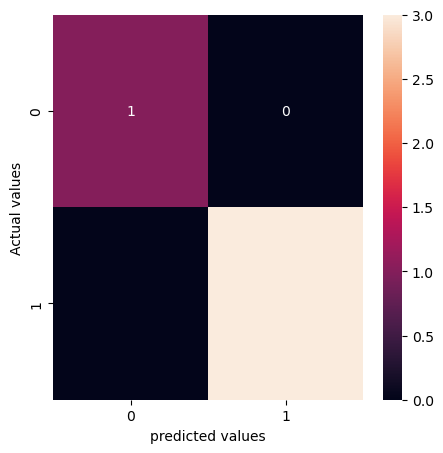

In [78]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, annot = True)
plt.ylabel('Actual values')
plt.xlabel('predicted values')
plt.show()

## Plot the decision tree

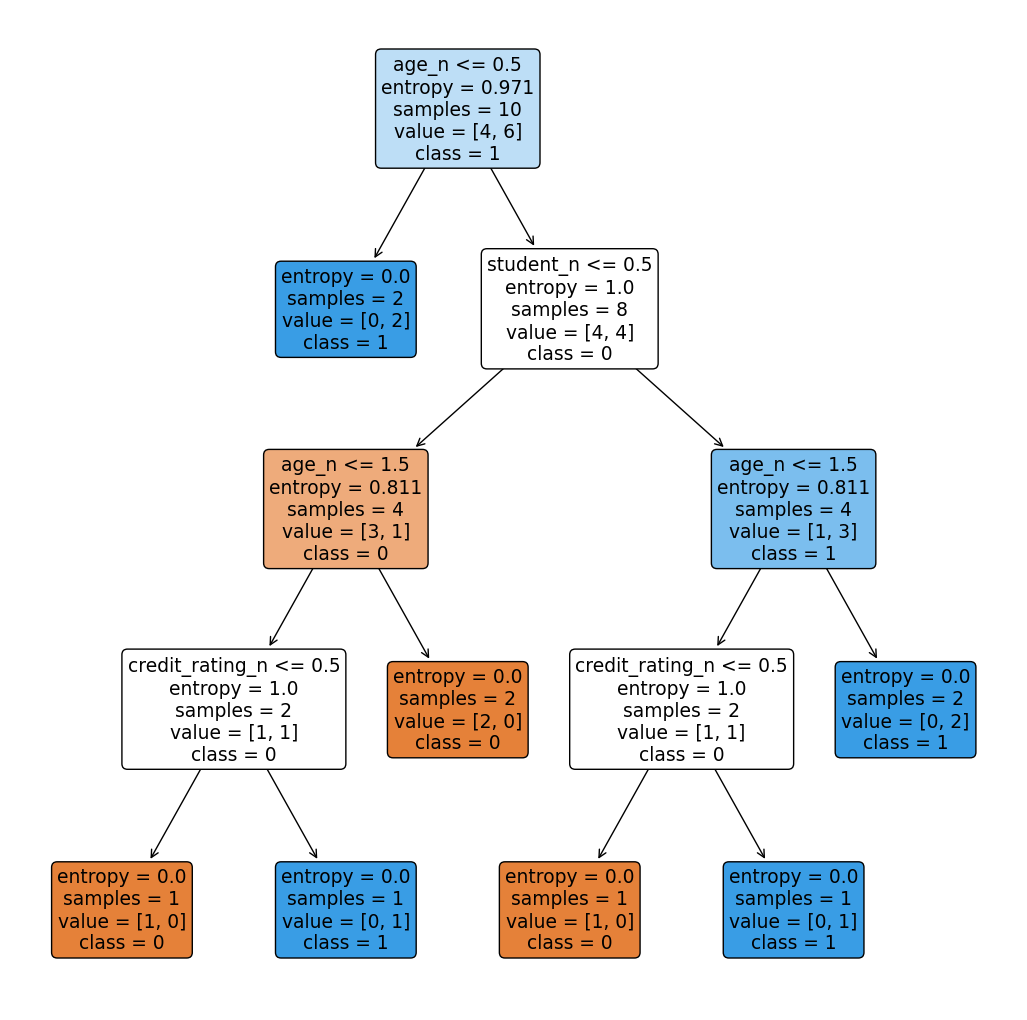

In [79]:
#graphical visualization of tree
from sklearn.tree import plot_tree
# help you to produce the figure of tree
plt.figure(figsize=(13,13))
dec_tree=plot_tree(decision_tree=dt,feature_names=feature_cols,class_names=["0","1"],\
                   filled=True,rounded=True)